In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
import glob
import os
from dlisio import dlis

sys.path.append(os.path.abspath(os.path.join('..')))
from utils.data_preprocessing import *

### Load the CSV data into pandas dataframes

In [2]:
csv_data = {}
data_path = os.path.join('..', '..', 'data', 'csv_from_dlis', '**', '*.csv')

for file in glob.glob(data_path, recursive=True):
    relative_path = os.path.relpath(file, os.path.join('..', '..', 'data', 'csv_from_dlis'))

    csv_data[relative_path] = pd.read_csv(file)

### Rename the INDEX columns to TDEP

In [3]:
for key, df in csv_data.items():
    csv_data[key] = df.rename(columns=lambda col: 'TDEP' if col.startswith('INDEX') else col)

### Create dataframes for GR data

In [4]:
gr_data = {}

for key, df in csv_data.items():
    try:
        gr_df = df[['GR', 'TDEP']]

        gr_data[key] = gr_df
    except:
        print(f"The frame {key} doesn't have GR")

The frame 1CSC 0001  SE\logical_file_1\frame_0.csv doesn't have GR
The frame 1CSC 0001  SE\logical_file_13\frame_0.csv doesn't have GR
The frame 1CSC 0001  SE\logical_file_2\frame_0.csv doesn't have GR
The frame 1CSC 0001  SE\logical_file_3\frame_0.csv doesn't have GR
The frame 1CSC 0001  SE\logical_file_4\frame_0.csv doesn't have GR
The frame 1CSC 0001  SE\logical_file_5\frame_0.csv doesn't have GR
The frame 1CSC 0001  SE\logical_file_6\frame_0.csv doesn't have GR
The frame 1CSC 0001  SE\logical_file_7\frame_0.csv doesn't have GR
The frame 1CSC 0001  SE\logical_file_8\frame_0.csv doesn't have GR
The frame 1CSC 0001  SE\logical_file_9\frame_0.csv doesn't have GR
The frame 1IDA 0001  SE\logical_file_0\frame_0.csv doesn't have GR
The frame 1IDA 0001  SE\logical_file_1\frame_0.csv doesn't have GR
The frame 1IDA 0001  SE\logical_file_2\frame_0.csv doesn't have GR
The frame 1IDA 0001  SE\logical_file_3\frame_0.csv doesn't have GR
The frame 1IDA 0001  SE\logical_file_4\frame_0.csv doesn't ha

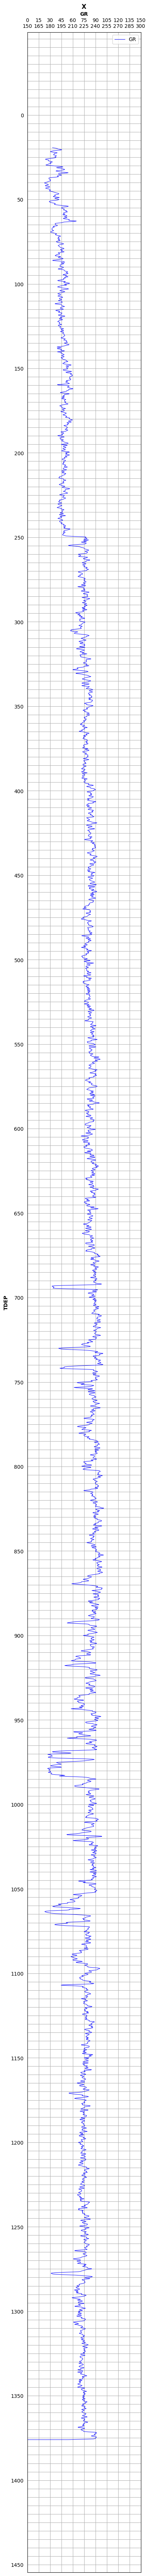

In [5]:
fig, axs = plt.subplots(1, 1, figsize=(4, 90))

plot_gr_logs(axs, gr_data['1CSC 0001  SE\\logical_file_0\\frame_0.csv'], 'X')